## SG and SGD

#### Linear regression

The task is
$$
\Vert Xw - y \Vert^2 \to \underset{w}{\min}
$$

$$
\nabla_w \left [  w^TX^TXw - w^TX^Ty - y^TXw + y^Ty \right ] = 2X^TXw - 2X^Ty = 0
$$

$$
w = (X^TX)^{-1}X^Ty
$$
$$
\nabla L(w) = 2X^T(Xw-y) 
$$

In [3]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

n_features = 2
X, y = make_regression(
    1000,
    n_features=n_features,
    n_informative=2,
    random_state=0,
)
X.shape, y.shape

((1000, 2), (1000,))

In [4]:
np.random.seed(2)
w_0 = np.random.uniform(-100, 100, (n_features))
w_true = np.linalg.inv(X.T @ X) @ X.T @ y

In [5]:
def loss(X, y, w):
    return np.sum((X @ w - y) ** 2)

In [6]:
np.sum((X @ w_true - y) ** 2)

1.8002858101005668e-26

In [7]:
def plot_w_history(w_history, w_true):
    plt.figure(figsize=(14,8))
    plt.scatter(np.repeat(w_true[0], 2), np.repeat(w_true[1], 2), s=[50, 10], color=['k', 'w'])
    plt.scatter(w_history[:, 0], w_history[:, 1], color='b', s=10, alpha=0.6)
    for i in range(1, w_history.shape[0]):
        plt.annotate('', xy=w_history[i], xytext=w_history[i-1],
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                       va='center', ha='center')

    theta0_grid = np.linspace(-100, 100, 101)
    theta1_grid = np.linspace(-100, 100, 101)

    theta0 = theta0_grid[np.newaxis, :, np.newaxis]
    theta1 = theta1_grid[:, np.newaxis, np.newaxis]
    L_grid = np.average((y - X[:, 0] * theta0 - X[:, 1] * theta1) ** 2, axis=2) / 2
    X_grid, Y_grid = np.meshgrid(theta0_grid, theta1_grid)
    contours = plt.contour(X_grid, Y_grid, L_grid, 100)
    plt.clabel(contours)
    plt.xlim((-100, 100))
    plt.ylim((-100, 100))
    plt.show()

#### Simple GD

In [8]:
def gd(X,y,w_0, eta=1e-4,n_iter = 200 ):
	w = w_0.copy()
	w_history = [w.copy()]
	for i in range(1,n_iter):
		w -= eta * X.T * 2 @ (X @ w  - y)
		w_history.append(w.copy())
	return np.array(w_history)

In [9]:
w_history = gd(X, y, w_0)

In [10]:
assert np.isclose(w_history[-1], w_true, atol=1e-1).all()

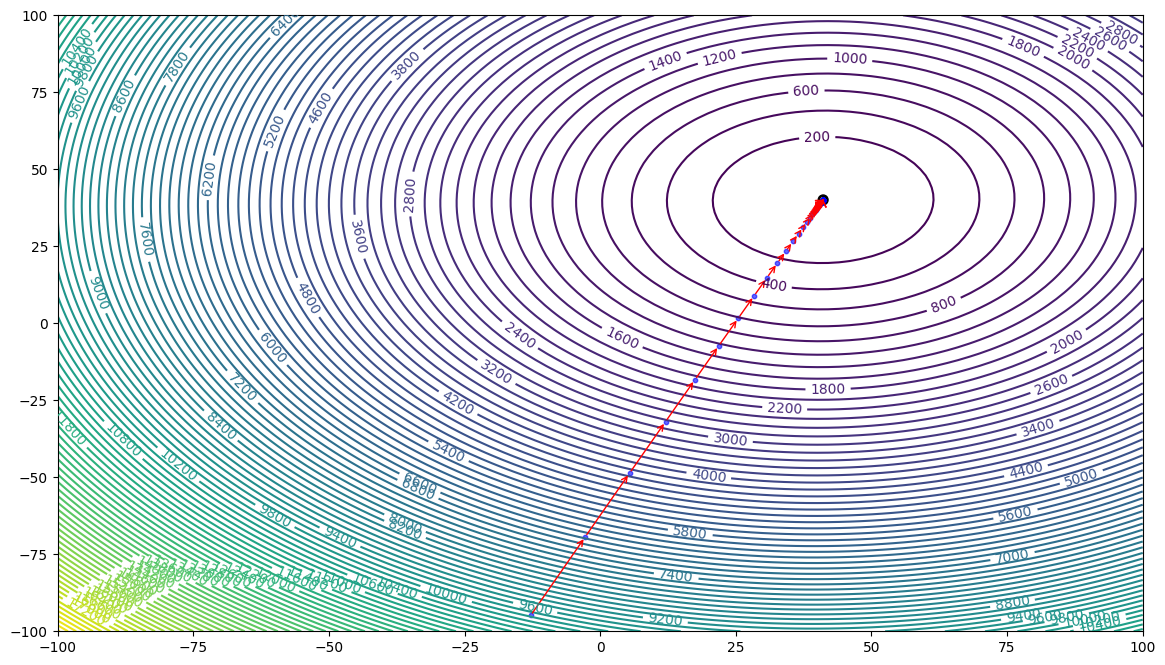

In [11]:
plot_w_history(w_history, w_true)

#### Simple SGD

In [12]:
def sgd(X, y, w_0, eta=0.001, n_iter=300, batch_size=100):
    np.random.seed(0)
    w = w_0.copy()
    w_history = [w.copy()]
    for i in range(1, n_iter):
        mask = np.random.choice(X.shape[0], size = batch_size, replace=False)
        X_mask = X[mask]
        Y_mask = y[mask]
        w -= eta * X_mask.T * 2 @ (X_mask @ w  - Y_mask)
        w_history.append(w.copy())
    return np.array(w_history)

In [13]:
w_history_sgd = sgd(X, y, w_0, eta=0.001)

In [14]:
assert np.isclose(w_history_sgd[-1], w_true, atol=1e-1).all()

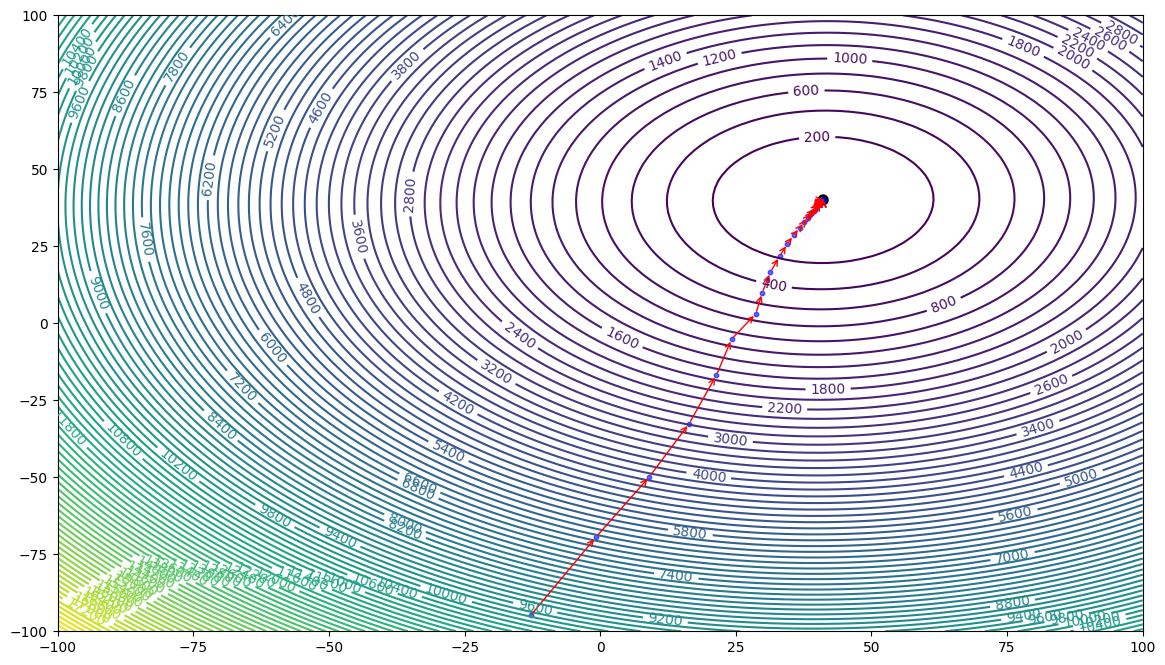

In [15]:
plot_w_history(w_history_sgd, w_true)

#### Add schedule v1

add schedule ass $\eta_t = \frac{1}{1+t}$

In [16]:
def lr_shedule(t):
    return 1/(1+t)

def sgd_lr_schedule_v1(X, y, w_0, n_iter=300, batch_size=100):
    np.random.seed(0)
    w = w_0.copy()
    w_history = [w.copy()]
    for i in range(1, n_iter):
        mask = np.random.choice(X.shape[0], size = batch_size, replace=False)
        X_mask = X[mask]
        Y_mask = y[mask]
        
        w -= lr_shedule(i*200) * X_mask.T * 2 @ (X_mask @ w  - Y_mask)
        w_history.append(w.copy())
    return np.array(w_history)

In [17]:
w_history_sqd_lr_schedule_v1 = sgd_lr_schedule_v1(X, y, w_0)

In [18]:
assert np.isclose(w_history_sqd_lr_schedule_v1[-1], w_true, atol=1e-1).all()

In [19]:
assert np.isclose(w_history_sqd_lr_schedule_v1[-1], w_true, atol=1e-1).all()

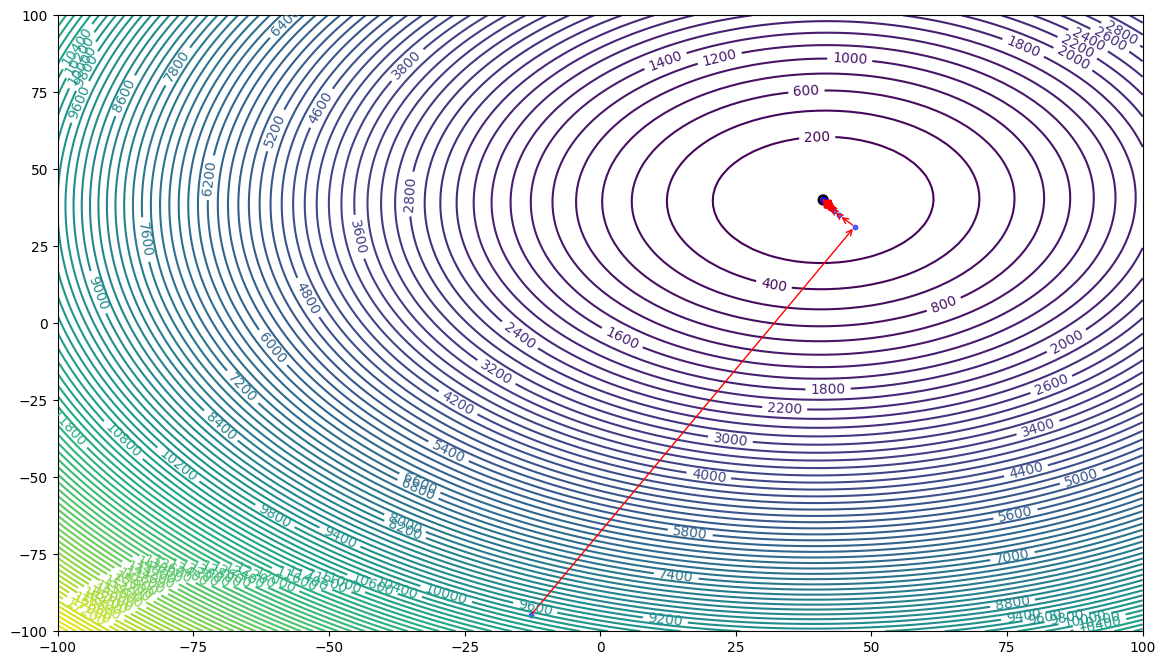

In [20]:
plot_w_history(w_history_sqd_lr_schedule_v1, w_true)

#### Add shedule_v2

Add shedule ass $\eta_t = \frac{\alpha}{t^{\beta}}$

In [28]:
def lr_shedule_v2(t, alpha, beta):
    return alpha / (t ** beta)

def sgd_lr_schedule_v2(X, y, w_0, eta=1e-3, n_iter=300, batch_size=100, beta=0.5):
    np.random.seed(0)
    w = w_0.copy()
    w_history = [w.copy()]
    for i in range(1, n_iter):
        mask = np.random.choice(X.shape[0], size = batch_size, replace=False)
        X_mask = X[mask]
        Y_mask = y[mask]
        
        w -= lr_shedule_v2(i,eta,beta) * X_mask.T * 2 @ (X_mask @ w  - Y_mask)
        w_history.append(w.copy())
    return np.array(w_history)

In [29]:
w_history_sqd_lr_schedule_v2 = sgd_lr_schedule_v2(X, y, w_0)

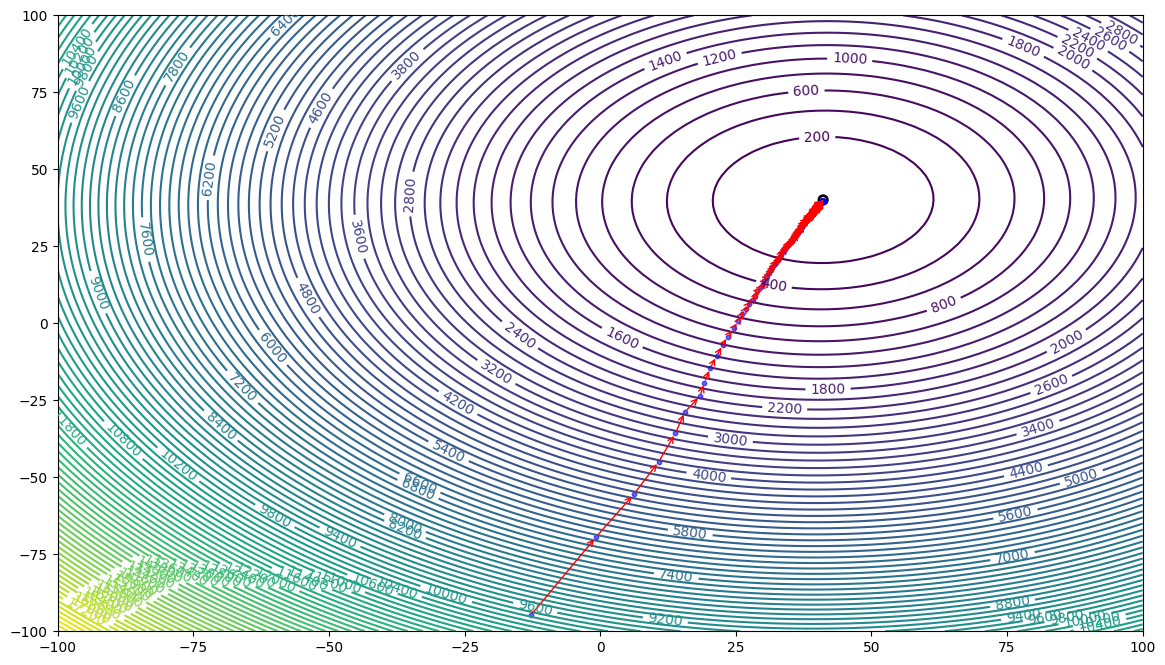

In [30]:
plot_w_history(w_history_sqd_lr_schedule_v2, w_true)

#### Add stopping criterion

In [31]:
def sgd_lr_schedule_v2(X, y, w_0, eta=1e-3, n_iter=10000, batch_size=100, beta=0.5, eps=1e-4):
    np.random.seed(0)
    w = w_0.copy()
    w_history = [w.copy()]
    for i in range(1, n_iter):
        mask = np.random.choice(X.shape[0], size = batch_size, replace=False) 
        X_mask = X[mask]
        Y_mask = y[mask]
        
        w -= lr_shedule_v2(i,eta,beta) * X_mask.T * 2 @ (X_mask @ w  - Y_mask)
    
        if (np.abs(w - w_history[-1]) < eps).all():
            print(f'Stop on iter {i}')
            break
        w_history.append(w.copy())
    return np.array(w_history)

In [32]:
w_history_sqd_lr_schedule_v2 = sgd_lr_schedule_v2(X, y, w_0)

Stop on iter 586


In [33]:
assert np.isclose(w_history_sqd_lr_schedule_v2[-1], w_true, atol=1e-1).all()

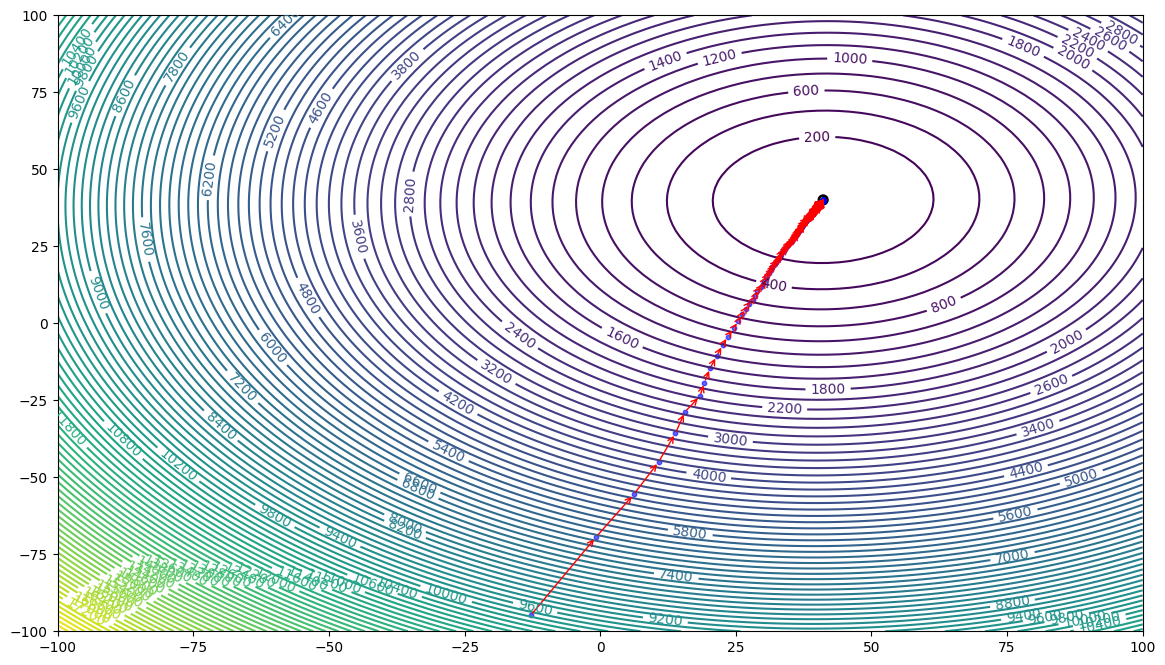

In [34]:
plot_w_history(w_history_sqd_lr_schedule_v2, w_true)